In [11]:
import numpy as np
import matplotlib.pyplot as plt
import configparser

In [12]:
n, m = 8, 8

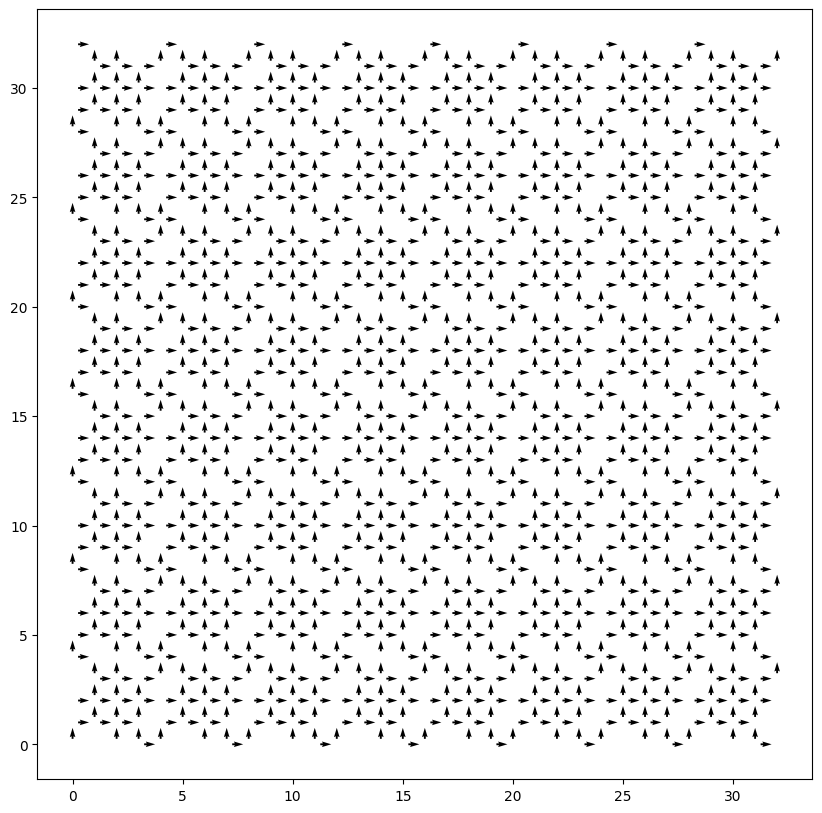

In [13]:
x = np.array([0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8])/2
y = np.array([1, 2, 4, 8, 3, 5, 7, 2, 4, 6, 1, 3, 5, 7, 2, 4, 6, 1, 3, 5, 0, 4, 6, 7])/2
mx = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])
my = np.array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])
#plt.ylim(9, -1)
sys = np.array([x, y, mx, my])
plt.figure(figsize=(10, 10))
for i in range(n):
    for j in range(m):
        if i == 0 and j == 0:
            continue
        sys = np.append(sys, np.array([x+4*i, y+4*j, mx, my]), axis=1)
sys = sys.T
#sys[:, :2] = sys[:, :2] / 2
plt.quiver(sys[:, 0], sys[:, 1], sys[:, 2], sys[:, 3], pivot='mid')

In [14]:
# np.savetxt(f"cyrrhus_N{sys.shape[0]}.txt", sys)
# print(8 * n, 8 * m)

In [15]:
def save_to_mfsys(filename, system):
    N = len(system)
    head = f'[header]\nversion=2\ndimensions=3\ntype=standart\nsize={N}\nemin=0.000000\nemax=0.000000\nstate={"0"*N}\nminstate=\nmaxstate=\ninteractionrange=0\nsizescale=1\nmagnetizationscale=1\n[parts]'
    np.savetxt(filename, np.vstack((np.arange(N), system[:,[0,1]].T, np.zeros([N]), system[:,[2,3]].T, np.zeros([2,N]))).T, fmt="%i\t%.15f\t%.15f\t%.15f\t%.15f\t%.15f\t%.15f\t%i", comments="", header=head)

In [16]:
save_to_mfsys(f"cyrrhus_N{sys.shape[0]}.mfsys", sys)

In [17]:
print('sbatch -p common -N 1 -o "cyrrhus/cyrrhus_N1536.out" --exclusive -J "n0" start.sh cyrrhus/cyrrhus_N1536.ini -f cyrrhus/cyrrhus_N1536.mfsys')

sbatch -p common -N 1 -o "cyrrhus/cyrrhus_N1536.out" --exclusive -J "n0" start.sh cyrrhus/cyrrhus_N1536.ini -f cyrrhus/cyrrhus_N1536.mfsys


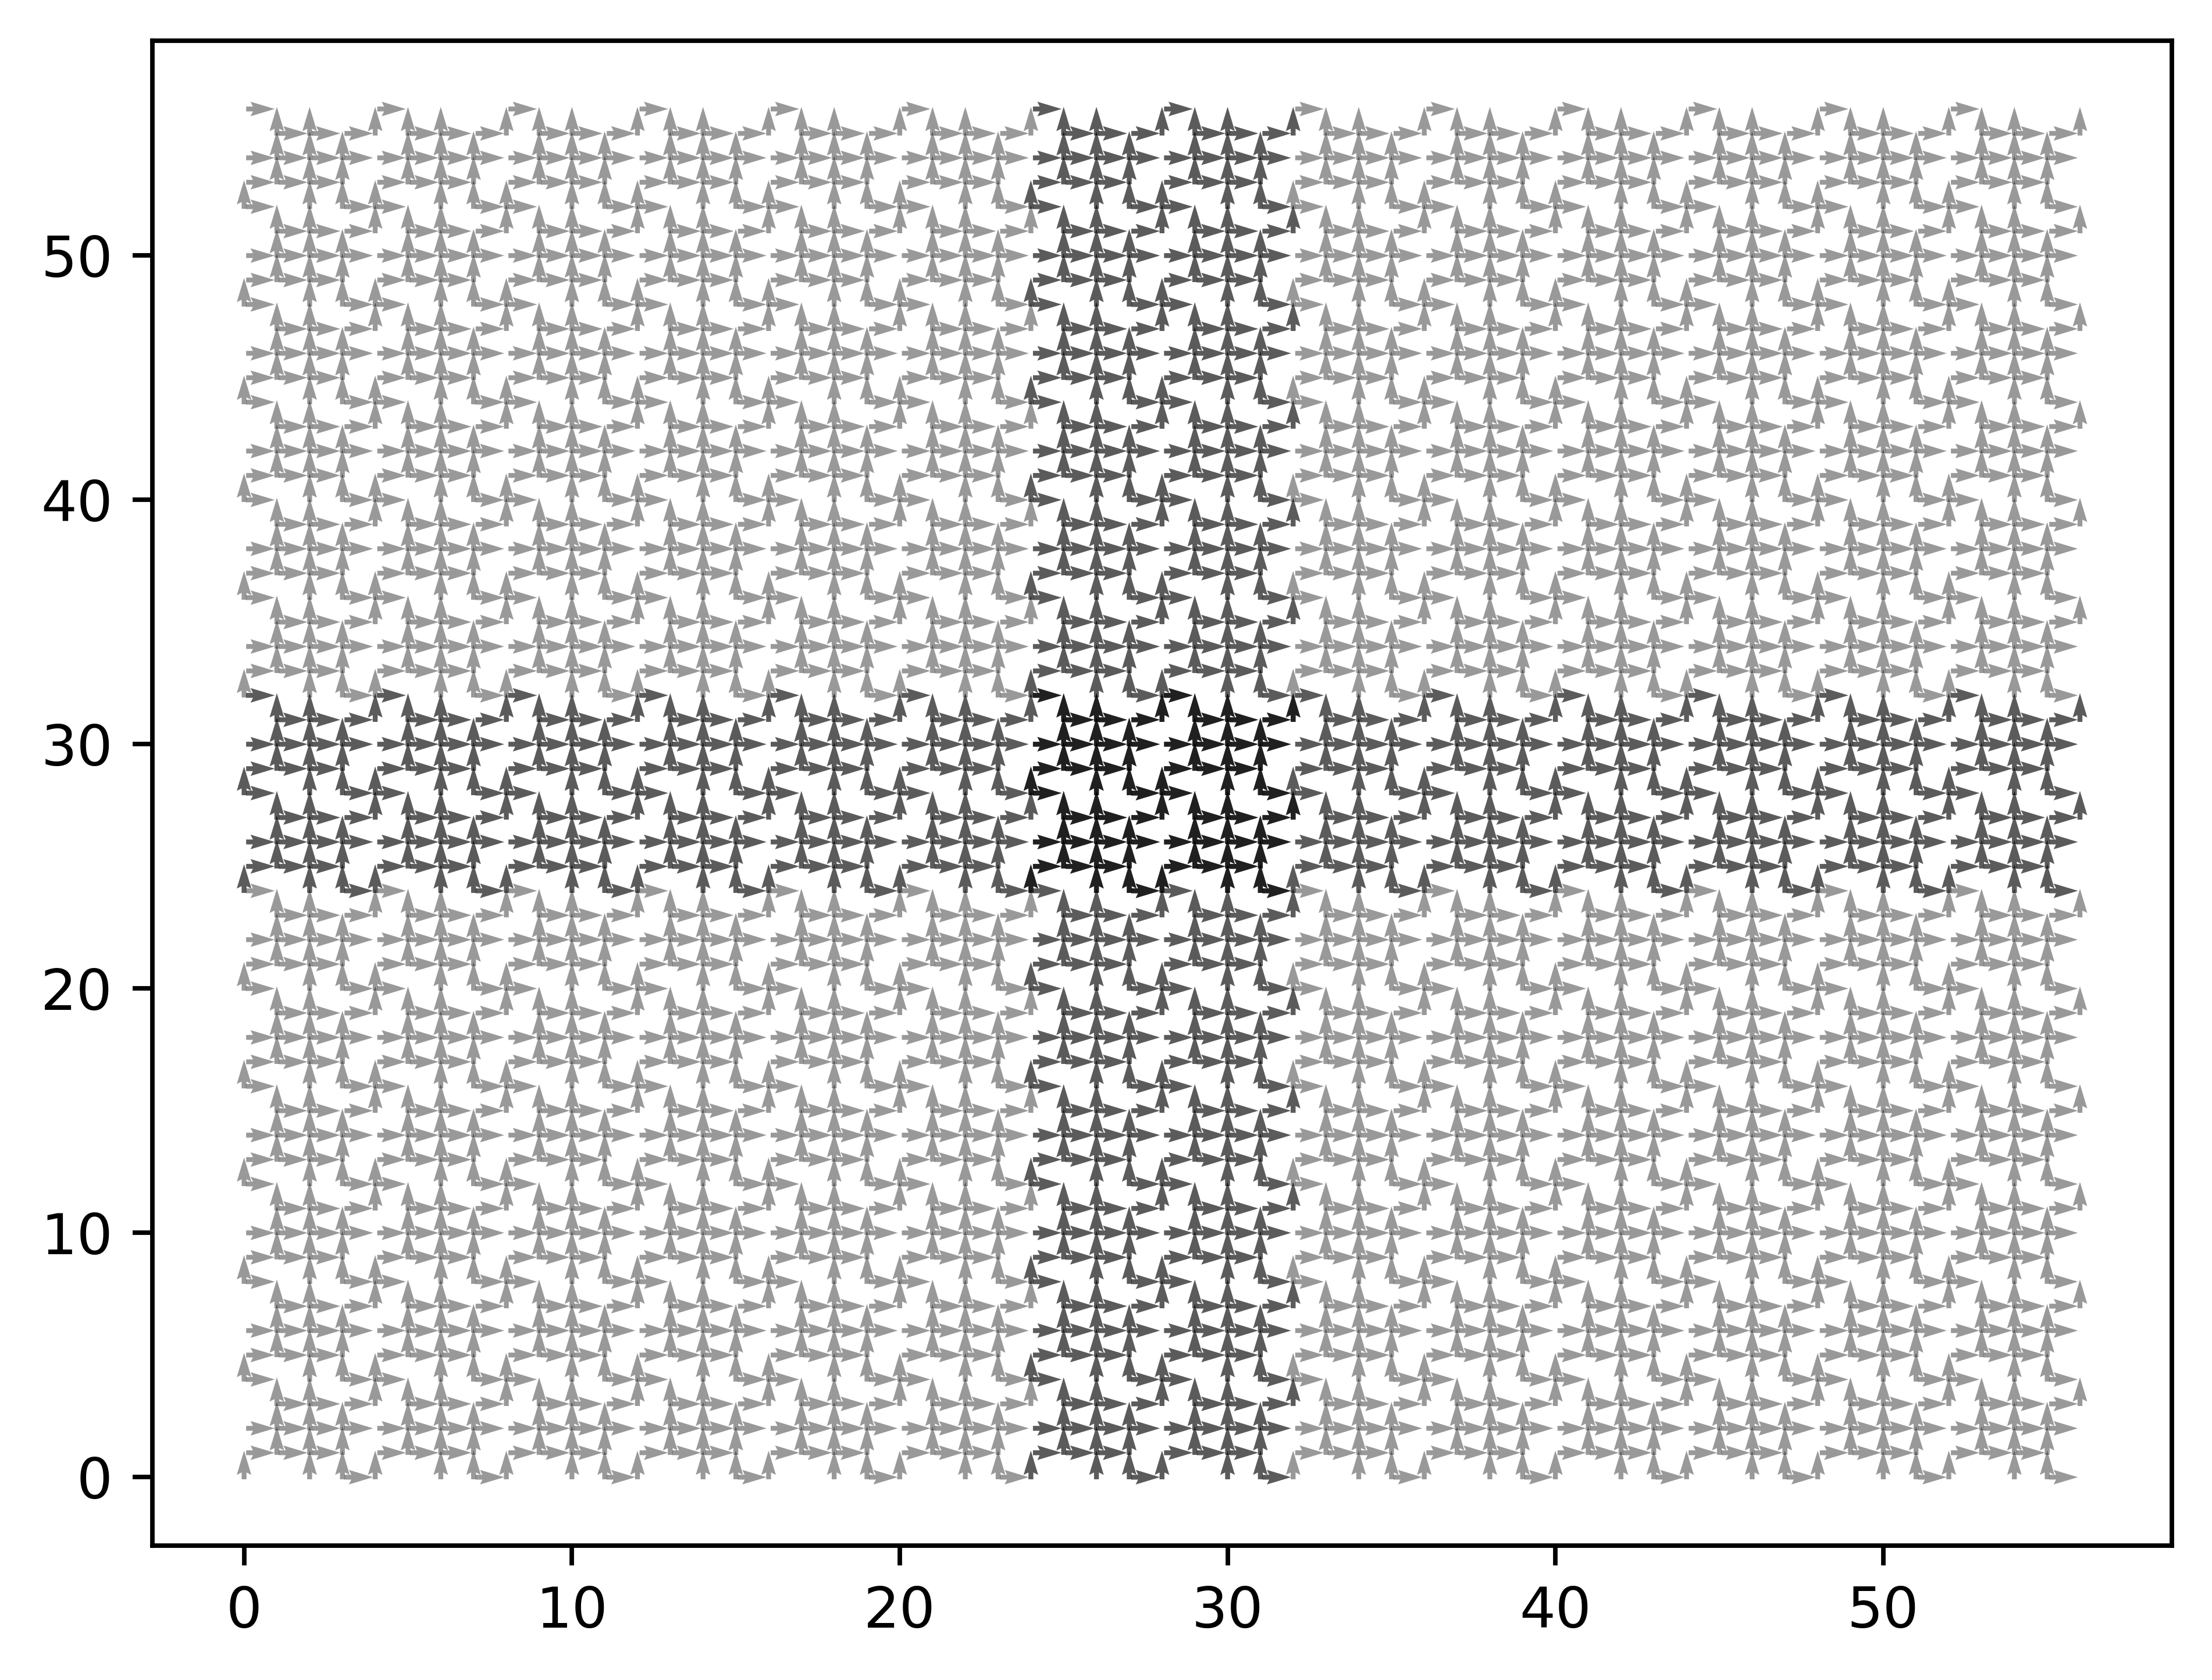

In [18]:
delta=24
plt.figure(dpi=700)
plt.quiver(sys[:, 0], sys[:, 1], sys[:, 2], sys[:, 3], pivot='mid', alpha=0.4)
plt.quiver(sys[:, 0]+delta, sys[:, 1]+delta, sys[:, 2], sys[:, 3], pivot='mid', alpha=0.4)
plt.quiver(sys[:, 0]+delta, sys[:, 1], sys[:, 2], sys[:, 3], pivot='mid', alpha=0.4)
plt.quiver(sys[:, 0], sys[:, 1]+delta, sys[:, 2], sys[:, 3], pivot='mid', alpha=0.4)


In [19]:
def make_ini(n: int, m: int, temperatures=np.logspace(-1, 1, 20), name='cyrrhus.ini', steps=10000, r=5.1):
    config = configparser.ConfigParser()
    syssize_x = n*4
    syssize_y = n*4


    config['main'] = {
        'file': f'cyrrhus_N{sys.shape[0]}.mfsys',
        'heatup': f'{steps}',
        'calculate': f'{steps}',
        'range': f'{r}',
        'seed': '123',
        'temperature': ', '.join(map(str, temperatures)),
        'field': '0|0',
        'boundaries': 'periodic',
        'size': f'{syssize_x}|{syssize_y}',
        'restart': '1',
        'restartThreshold': '1e-6',
        'saveGS': 'cyrrhus_gs.mfsys'
    }
    with open(name, 'w') as f:
        config.write(f)
    print("\n ############# ini file created successfully #############\n")

make_ini(n, m, temperatures=np.logspace(-1, 1, 50), name=f"cyrrhus_N{sys.shape[0]}.ini")
print(f"sbatch -p common -N 1 -o 'cyrrhus/cyrrhus_N{sys.shape[0]}.out' --exclusive -J 'n0' start.sh cyrrhus/cyrrhus_N{sys.shape[0]}.ini -f cyrrhus/cyrrhus_N{sys.shape[0]}.mfsys --save 10")


 ############# ini file created successfully #############

sbatch -p common -N 1 -o 'cyrrhus/cyrrhus_N1536.out' --exclusive -J 'n0' start.sh cyrrhus/cyrrhus_N1536.ini -f cyrrhus/cyrrhus_N1536.mfsys --save 10
